<a href="https://colab.research.google.com/github/qusaysellat/tensorflow-tutorial/blob/master/Bi_RNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**THIS IS A SIMPLE BIDIRECTIONAL LSTM RECURRENT NEURAL NETWORK TO CLASSIFY DIGIT IMAGES IN** *MNIST DATASET*

>NAME : [QUSAY SELLAT](https://github.com/qusaysellat)

>FOR MORE INFORMATION ABOUT 'MNIST' VISIT
[THIS SITE](http://yann.lecun.com/exdb/mnist/)

In [0]:
# lets import important frameworks
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:
tf.reset_default_graph()

In [0]:
# then import the MNIST dataset
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('/tmp/data/', one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [0]:
# lets try to play with this data set

# lets see the dimensions of train, validation, and test datasets - note that mnist is a named tupple
print("dimensions of images and labels of training set")
print(mnist.train.images.shape)
print(mnist.train.labels.shape)

print("dimensions of images and labels of validation set")
print(mnist[1].images.shape)
print(mnist[1].labels.shape)

print("dimensions of images and labels of testing set")
print(getattr(mnist, 'test').images.shape)
print(getattr(mnist, 'test').labels.shape)

dimensions of images and labels of training set
(55000, 784)
(55000, 10)
dimensions of images and labels of validation set
(5000, 784)
(5000, 10)
dimensions of images and labels of testing set
(10000, 784)
(10000, 10)


In [0]:
# lets take a sample of our data and discover its values
print('the first 8 labels in the testing set:')
print(mnist[2].labels[:8])

the first 8 labels in the testing set:
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


first 8 digits in the testing set:


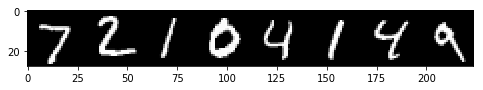

In [0]:
# now lets draw the sample we have just viewed

canvas = np.zeros((28, 28 * 8))
for i in range(8):
  canvas[:, 28 * i : 28 * (i + 1)] = mnist[2].images[i, :].reshape([28 ,28])
 
print("first 8 digits in the testing set:")
plt.figure(figsize = (8, 64))
plt.imshow(canvas, origin = 'upper', cmap ='gray')
plt.show()

In [0]:
# now we define hyperparameters used in training
LR = 0.001
steps = 10001
batch_size = 256

In [0]:
# then we define rnn structure parameters
I = 28 # input size
O = 10 # output size : 10 classes
T = 28 # timesteps
h = 128 # nodes in the hidden layer

In [0]:
# define the placeholders for input and output
X = tf.placeholder(tf.float32, [None, T, I])
Y = tf.placeholder(tf.float32, [None, O])

In [0]:
# define used weights and biases
W = {
    'W_out' : tf.Variable(tf.random_normal([h * 2, O]))
}

b = {
    'b_out' : tf.Variable(tf.random_normal([O]))
}

In [0]:
# lets define forward phase operations
def Bi_RNN(x, W_, b_) :

  # first, lets reshape the input in a way we extract the timestamps to be able to feed them into the LSTM network
  x = tf.unstack(x, T, 1)

  # then we define the forward LSTM cell
  f_lstm_cell = tf.contrib.rnn.BasicLSTMCell(h, forget_bias=1.0)

  # then we define the backward LSTM cell
  b_lstm_cell = tf.contrib.rnn.BasicLSTMCell(h, forget_bias=1.0)

  # now feed above information into a bidirectional rnn model
  outputs, last_state_1, last_state_2 = tf.contrib.rnn.static_bidirectional_rnn(f_lstm_cell, b_lstm_cell, x, dtype=tf.float32)

  # finally, lets calculate the output
  return tf.add(tf.matmul(outputs[-1], W_['W_out']), b_['b_out'])

In [0]:
# now we continue the basic operations in an RNN

# get the logits and calculate predictions and classes
logits = Bi_RNN(X, W, b)
preds = tf.nn.softmax(logits, 1)
classes = tf.arg_max(preds, 1)

# define the loss function
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = Y, logits = logits))

# define the optimizer function
train_op = tf.train.GradientDescentOptimizer(LR).minimize(loss_op)

# define the accuracy function
correct = tf.equal(tf.arg_max(Y, 1), tf.arg_max(preds, 1))
acc_op = tf.reduce_mean(tf.cast(correct, tf.float32))

# define initializer
init = tf.global_variables_initializer()

# define session saver
saver = tf.train.Saver()

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.Bidirectional(keras.layers.RNN(cell, unroll=True))`, which is equivalent to this API
Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use `tf.math.argmax` instead
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



step : 0 -- accuracy : 0.070
step : 100 -- accuracy : 0.152
step : 200 -- accuracy : 0.281
step : 300 -- accuracy : 0.316
step : 400 -- accuracy : 0.410
step : 500 -- accuracy : 0.387
step : 600 -- accuracy : 0.473
step : 700 -- accuracy : 0.453
step : 800 -- accuracy : 0.441
step : 900 -- accuracy : 0.445
step : 1000 -- accuracy : 0.422
step : 1100 -- accuracy : 0.488
step : 1200 -- accuracy : 0.539
step : 1300 -- accuracy : 0.523
step : 1400 -- accuracy : 0.520
step : 1500 -- accuracy : 0.527
step : 1600 -- accuracy : 0.562
step : 1700 -- accuracy : 0.535
step : 1800 -- accuracy : 0.547
step : 1900 -- accuracy : 0.555
step : 2000 -- accuracy : 0.543
step : 2100 -- accuracy : 0.625
step : 2200 -- accuracy : 0.590
step : 2300 -- accuracy : 0.641
step : 2400 -- accuracy : 0.602
step : 2500 -- accuracy : 0.609
step : 2600 -- accuracy : 0.605
step : 2700 -- accuracy : 0.613
step : 2800 -- accuracy : 0.648
step : 2900 -- accuracy : 0.656
step : 3000 -- accuracy : 0.676
step : 3100 -- accur

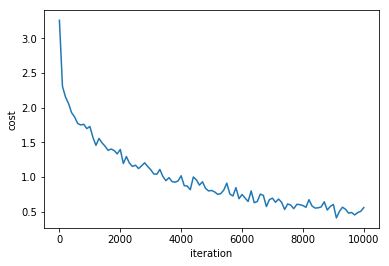

In [0]:
with tf.Session() as sess :

  # initialize global variables
  sess.run(init) 

  # initialize costs list
  costs = list()

  for i in range(steps) :

    # get next batche
    batch_x, batch_y = mnist.train.next_batch(batch_size)

    # reshape to set a convenient feed for our model
    batch_x = batch_x.reshape([-1, 28, 28])

    # optimize
    _ = sess.run(train_op, feed_dict={X : batch_x, Y : batch_y})

    if i % 100 == 0 :
      # get cost and accuracy
      l, a = sess.run([loss_op, acc_op], feed_dict={X : batch_x, Y : batch_y})

      # add cost to costs list
      costs.append((i, l))

      # print accuracy
      print('step : ' + str(i) + ' -- accuracy : ' + '{:.3f}'.format(a))

  print('training phase finished successfully. \nnotice how training cost changes with iteration')

  plt.xlabel('iteration')
  plt.ylabel('cost')
  plt.plot([i[0] for i in costs], [i[1] for i in costs])
  plt.show()

  # save the variables
  saving_path = saver.save(sess, '/tmp/birnnmodel.ckpt')

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /tmp/birnnmodel.ckpt
cost on the test set : 0.466
accuracy on the test set : 0.859
lets see how our algorithm classified first 16 examples


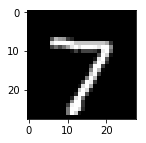

our algorithm predicted above digit as : 7



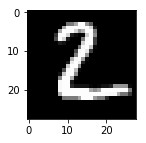

our algorithm predicted above digit as : 2



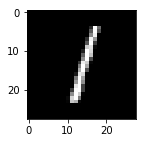

our algorithm predicted above digit as : 1



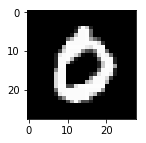

our algorithm predicted above digit as : 0



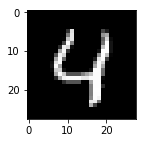

our algorithm predicted above digit as : 4



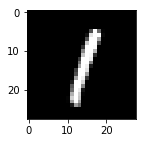

our algorithm predicted above digit as : 1



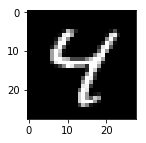

our algorithm predicted above digit as : 4



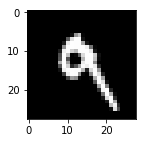

our algorithm predicted above digit as : 9



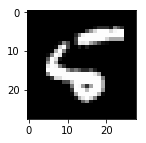

our algorithm predicted above digit as : 6



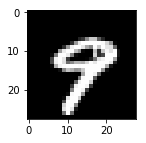

our algorithm predicted above digit as : 9



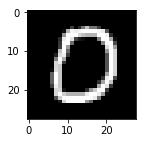

our algorithm predicted above digit as : 0



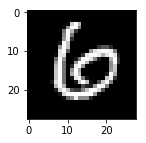

our algorithm predicted above digit as : 6



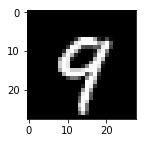

our algorithm predicted above digit as : 9



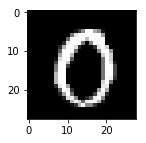

our algorithm predicted above digit as : 0



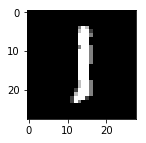

our algorithm predicted above digit as : 1



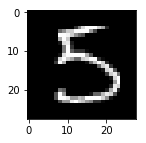

our algorithm predicted above digit as : 5



In [0]:
# lets examine our model on the test set

with tf.Session() as sess :
  
  saver.restore(sess, '/tmp/birnnmodel.ckpt')
  
  images = mnist.test.images.reshape([-1, T, I])
  labels = mnist.test.labels
  
  classes_, c, a = sess.run([classes, loss_op, acc_op], feed_dict = {X : images, Y : labels})
  
  print('cost on the test set : ' + '{:.3f}'.format(c))
  print('accuracy on the test set : ' + '{:.3f}'.format(a))
  
  print('lets see how our algorithm classified first 16 examples')
  
  for i in range(16):
    
    plt.figure(figsize = (2, 2))
    plt.imshow(images[i], origin = 'upper', cmap = 'gray')
    plt.show()
    print('our algorithm predicted above digit as : ' + str(classes_[i]) + '\n')